# Intro to Pandas 

Tonight we're going to be starting our journey through the Pandas library (created by Wes McKinney). When we refer to working in Pandas, we're typically talking about working within a dataframe, which is what we'll focus on tonight. We'll be diving into Pandas DataFrames, which are objects that will hold our data, allowing us to interact with it, manipulate it, and eventually throw it into machine learning algorithms (if we want). 

Since a Pandas DataFrame is an **object**, this means that we're going to interact with it in much the same way that we interact with all of our other objects in python. Before we get to actually interacting with DataFrames, though, we'll have to get one, and get one with data in it! There's one quick step that we have to do before that... 

## Pandas Import 

```python
import pandas as pd # Standard import. 
```

Here I've shown how we get access to everything in the Pandas library - we import it! Also note the python comment `"# Standard import"` out to the right of our import. This was to note that this is the standard way to import the Pandas library. We should always be sure that if we are importing the entire pandas library, we follow this syntax. It's common practice to use `pd` as the alias, and we tend to follow common practice whenever possible. This makes it easier for others to read our code.

## Getting a DataFrame Object

There are two basic ways that we can get a Pandas DataFrame object to work with. The first is by using data that is already in our Python program, in conjuction with the `DataFrame` constructor. The second is by reading in external data through the pandas module (which remembered we've imported and made accessible via `pd`). For reference, here are the [docs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) for Pandas DataFrames. 

##### Using data already in our Python program

If we are using data that is already in our Python program, then we are going to be passing that data to the `DataFrame` constructor. We typically do this in one of two ways. The first involves passing in a list of dictionaries, whereas the second involves passing in two lists. Let's dive into the first...

In [4]:
import pandas as pd # I haven't actually done this in code yet. 
data_lst = [{'a': 1, 'b': 2, 'c':3}, {'a': 4, 'c':6, 'd':7}]
df = pd.DataFrame(data_lst)
df

,a,b,c,d
0,1,2.0,3,NaN
1,4,NaN,6,7.0


What's going on here? How do I read that DataFrame output right above, and how did that list of dictionaries translate to that DataFrame? 

Each and every one of our Pandas DataFrames will consist of **rows** and **columns**, where the columns will be denoted and accessed via their names, and the rows will be denoted and access via the indices of the DataFrame. Above, we can look at our columns and see that their names are `a`, `b`, `c`, and `d`. We can similiary look at our rows and see that they are indexed by `0` and `1`. These column names and indices are how we will access this data later. How did the `DataFrame` constructor take our list of dictionaries and put it into the DataFrame in that format, though?

When the Pandas DataFrame constructor encounters a list of dictionaries like we gave it, it interprets each dictionary to be a row in the DataFrame. The keys are read as the column names and the values as the values for each column. By default, the DataFrame constructor will assign a column for **every** key that it sees in **any** dictionary in the list of dictionaries. If a particular dictionary in that list doesn't have a value for that key, then it assigns a `NaN` (stands for not a number) value for that index-column pair. Therefore, when the Pandas DataFrame above got the list of dictionaries, it saw `a`, `b`, `c`, and `d` keys, and thus created those columns. It then filled in the values associated with those keys, filling in a `NaN` if it didn't find that key (like it didn't find `d` in the first dictionary in our list). 

In [5]:
data_lst = [{'a': 1}, {'b':5}, {'c': 4}]
df = pd.DataFrame(data_lst)

**What do you expect our DataFrame to hold now?**

In [6]:
df

,a,b,c
0,1.0,NaN,NaN
1,NaN,5.0,NaN
2,NaN,NaN,4.0


The second way of creating a dataframe from data that is already in our Python program is to pass in a list of lists as the `data` argument, and a list of strings as the `columns` argument. The `pd.DataFrame()` constructor will assume that each individual list in the `data` argument is one row (i.e. if you pass in a list of 5 lists, your dataframe will have 5 rows). Below, we're passing in a list of 2 lists to the `data` parameter, which means that our DataFrame will have two rows.

In [7]:
data_vals = [[1, 2, 3], [4, 5, 6]]
data_cols = ['a', 'b', 'c']
df = pd.DataFrame(data=data_vals, columns=data_cols)
df

,a,b,c
0,1,2,3
1,4,5,6


It's important to note that this method is not quite as flexible as using a list of dictionaries. When passing in a list of lists via the `data` argument, we have to make sure that the greatest number of elements in any single list corresponds to the number of column names we are passing in via the `columns` argument (no more, no less). For example:

In [9]:
data_vals = [[1, 2], [4, 5, 6]]
data_cols = ['a', 'b', 'c']
df = pd.DataFrame(data=data_vals, columns=data_cols)

In [10]:
df

,a,b,c
0,1,2,NaN
1,4,5,6.0


We do, however, have the flexibility of passing in some rows with 'missing' data. The key to note here, though, is that the last column name will become what is filled with a `NaN` if a list is missing a column value (it will not be based off a key name like in our list of dictionaries). 

In [ ]:
data_vals = [[1, 2], [4, 5, 6]]
data_cols = ['a', 'b', 'c']
df = pd.DataFrame(data=data_vals, columns=data_cols)
df

#### Reading External Data

There are many ways that we can read external data into a Pandas DataFrame, and they will be called as a function that is available via the `pandas` module. As a result of importing the `pandas` module and making it accessible via `pd`, this means that we will call all of these functions via `pd`. Each one of these functions will **return** back to us a Pandas DataFrame object, populated with the external data that we read in. 

The [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/io.html) will show you all of the ways that you could load external data into a DataFrame. Basically, there is a way to load in data stored in any format (CSV, JSON, SQL, Excel, HTML). All of these take some form of a `read_{data_type}` function, which means that we will call them as `pd.read_{data_type}`.

So, if we wanted to load data in from a CSV, we would simply use:

```python
df = pd.read_csv('my_data.csv')
```

Note: This assumes that we have the column names in the first row of your .csv.

If we don't have the column names in the first row of our .csv, we could read in the .csv with the following:

```python
df = pd.read_csv('my_data.csv', header=None)
```

Note: This by default assigns numbers as the column names (starting with 0).

If we wanted to assign the column names as we read it in, we can pass in an additional `names` argument, where this `names` argument holds a list of the names we want to assign to the columns.

```python
df = pd.read_csv('my_data.csv', header=None, names=['col1', 'col2', ...., 'col12'])
```

We have looked at a couple of the parameters that we can pass arguments to when reading in data. Just note that the functions that are available to read in data from other sources will likely also have optional parameters that we can specify. 

In [ ]:
pd.read_

## Looking at Your Data

We got the following data to look at [here](http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/), the UCI repository of open data sets. It is also available in the `data` folder inside of our `day10_intro_pandas` folder. 

Given that our `DataFrame` is an object, we can imagine that it will have associated attributes and methods. There are a couple of each available to us to get a general sense of our data. We have two attributes that we will frequently use on our DataFrame - these will allow us to look at the shape of our data and the column names. We have four methods that are availiable on our dataframe for getting a general sense of our data: `info()`, `describe()`, `head()`, and `tail()`. Let's take a look at what these do. 

In [11]:
df = pd.read_csv('data/winequality-red.csv', delimiter=';')

In [12]:
df.shape # Gives you the number of rows and number of columns

(1599, 12)

In [14]:
rows = df.shape[0]
rows

1599

In [16]:
list(df.columns) # Gives you back a list of all of the column names. 

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [17]:
df.info() # Allows you to look at the data type for each column, and the number of null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [25]:
df['fixed acidity'].describe() # Gives you summary statistics for all of your numeric columns. 

count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64

In [20]:
df.head(2) # Shows you the first n columns (by default n = 5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [21]:
df.tail() # Shows you the last n columns (by default n = 5). 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


## Grabbing your data 

#### The Basics

We now know how to look at our data. What if we wanted to grab certain parts to look at, or certain parts to play around with/transform? Say we wanted to grab an entire row, or an entire column... how do we do that? Let's dive in by starting off with some indexing. 

The format we use to index into our dataframe and grab data will depend on exactly what subset of the data that we want to grab. If we want to grab entire rows or columns, then we can use bracket notation to do that (just like we use bracket notation to index into lists). If we want an entire column, then we're going to place the **column name** in brackets (and multiple column names in a list inside those brackets). We can also sometimes access a column via dot notation on the dataframe, which we'll show in a second. If we want an entire row, then we have to place **both** a **beginning and ending index** inside the brackets using slice notation `[start_index:end_index]` (it won't work to just place a single index in the brackets). 

In [22]:
# Let's take a quick look at the DataFrame that we're using to remind ourselves what it 
# looks like. 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [28]:
df['chlorides'] # Grabs the 'chlorides' column. 

0       0.076
1       0.098
2       0.092
3       0.075
4       0.076
5       0.075
6       0.069
7       0.065
8       0.073
9       0.071
10      0.097
11      0.071
12      0.089
13      0.114
14      0.176
15      0.170
16      0.092
17      0.368
18      0.086
19      0.341
20      0.077
21      0.082
22      0.106
23      0.084
24      0.085
25      0.080
26      0.080
27      0.106
28      0.080
29      0.082
        ...  
1569    0.056
1570    0.230
1571    0.038
1572    0.069
1573    0.075
1574    0.074
1575    0.060
1576    0.081
1577    0.076
1578    0.118
1579    0.053
1580    0.068
1581    0.053
1582    0.053
1583    0.074
1584    0.061
1585    0.066
1586    0.065
1587    0.066
1588    0.068
1589    0.073
1590    0.077
1591    0.089
1592    0.076
1593    0.068
1594    0.090
1595    0.062
1596    0.076
1597    0.075
1598    0.067
Name: chlorides, Length: 1599, dtype: float64

In [29]:
df.chlorides # Alternate syntax ('dot notation') for grabbing the 'chlorides' column. 

0       0.076
1       0.098
2       0.092
3       0.075
4       0.076
5       0.075
6       0.069
7       0.065
8       0.073
9       0.071
10      0.097
11      0.071
12      0.089
13      0.114
14      0.176
15      0.170
16      0.092
17      0.368
18      0.086
19      0.341
20      0.077
21      0.082
22      0.106
23      0.084
24      0.085
25      0.080
26      0.080
27      0.106
28      0.080
29      0.082
        ...  
1569    0.056
1570    0.230
1571    0.038
1572    0.069
1573    0.075
1574    0.074
1575    0.060
1576    0.081
1577    0.076
1578    0.118
1579    0.053
1580    0.068
1581    0.053
1582    0.053
1583    0.074
1584    0.061
1585    0.066
1586    0.065
1587    0.066
1588    0.068
1589    0.073
1590    0.077
1591    0.089
1592    0.076
1593    0.068
1594    0.090
1595    0.062
1596    0.076
1597    0.075
1598    0.067
Name: chlorides, Length: 1599, dtype: float64

In [31]:
df['volatile acidity']
df.volatile acidity # Dot notation only works if the column name has no spaces. 

SyntaxError: invalid syntax (<ipython-input-31-da5eee966b11>, line 2)

We can, however, alter the column headers to remove the spaces, at which point dot notation would work.  
The following code shows how we can quickly, and efficiently, eliminate spaces from the column names using list comprehension:

In [32]:
df2 = df.copy()
cols = df2.columns.tolist()
cols = [col.replace(' ', '_') for col in cols]
df2.columns = cols
df2.volatile_acidity

0       0.700
1       0.880
2       0.760
3       0.280
4       0.700
5       0.660
6       0.600
7       0.650
8       0.580
9       0.500
10      0.580
11      0.500
12      0.615
13      0.610
14      0.620
15      0.620
16      0.280
17      0.560
18      0.590
19      0.320
20      0.220
21      0.390
22      0.430
23      0.490
24      0.400
25      0.390
26      0.410
27      0.430
28      0.710
29      0.645
        ...  
1569    0.510
1570    0.360
1571    0.380
1572    0.690
1573    0.580
1574    0.310
1575    0.520
1576    0.300
1577    0.700
1578    0.670
1579    0.560
1580    0.350
1581    0.560
1582    0.715
1583    0.460
1584    0.320
1585    0.390
1586    0.310
1587    0.610
1588    0.660
1589    0.725
1590    0.550
1591    0.740
1592    0.510
1593    0.620
1594    0.600
1595    0.550
1596    0.510
1597    0.645
1598    0.310
Name: volatile_acidity, Length: 1599, dtype: float64

In [33]:
# We can access all of multiple columns by passing in a list of column names. 
df[['chlorides', 'volatile acidity']]

,chlorides,volatile acidity
0,0.076,0.700
1,0.098,0.880
2,0.092,0.760
3,0.075,0.280
4,0.076,0.700
5,0.075,0.660
6,0.069,0.600
7,0.065,0.650
8,0.073,0.580
9,0.071,0.500


In [34]:
df[:3] # This will grab from the beginning up to but not including the row at index 3. 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [35]:
# This will grab up to but not including the row at index 1 (i.e. it'll grab the row  at index 0). 
df[:1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [36]:
# This will not work because it is not a slice, and pandas instead looks for a column named 0. 
# It doesn't find one, hence the KeyError (remember that dataframes are mostly built up from dictionaries)
df[0]

KeyError: 0

In [37]:
# This won't work because we are trying to access a subset of rows 
# **and** columns at the same time. 
df[:1, 'volatile acidity'] 

TypeError: unhashable type: 'slice'

What if we want to grab certain rows **and** certain columns, rather than just entire rows or entire columns?

If we want to grab only certain rows and columns, there are three **methods** that we can use to index into a Pandas DataFrame: `loc[]`, `iloc[]`, and `ix[]`. Note that these are **methods**, which means that we will call them via dot notation on our `DataFrame` object. The difference between these three has to do with how we use them. `loc[]` is a purely label-location based indexer, `iloc[]` is a purely integer-location based indexer, and `ix[]` is a primarily label-location based indexer that falls back to integer indexing.

Because of the strict restrictions on the use of `loc[]` and `iloc[]`, I typically almost always use `ix[]`. It's much more flexible. 

In [38]:
# Let's look at our data real quickly again. 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [39]:
# Loc is label based. All of these will work, because they are recognized as labels on the 
# rows (index labels) or columns (column name labels). 
df.loc[0, 'fixed acidity'] # 0 is one of the index labels, and 'fixed acidity' is a column label.

7.4000000000000004

In [41]:
# Ranges on our index labels still work (as long as they're numeric).
df.loc[[0:10, 'fixed acidity']]

SyntaxError: invalid syntax (<ipython-input-41-520433611dfd>, line 2)

In [42]:
df.loc[10:15, ['chlorides', 'fixed acidity']]

,chlorides,fixed acidity
10,0.097,6.7
11,0.071,7.5
12,0.089,5.6
13,0.114,7.8
14,0.176,8.9
15,0.170,8.9


In [43]:
# These will all fail, because they attempt to access the columns by position integers, 
# and loc only takes labels. 
df.loc[0, 0]
df.loc[0:10, 0]
df.loc[10:15, [0, 4]]

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [0] of <class 'int'>

In [45]:
# The above will all work with .iloc, though, since it takes integers (and not labels)
df.iloc[0, 0]
df.iloc[0:10, 0]
# df.iloc[10:15, [0, 4]]

0     7.4
1     7.8
2     7.8
3    11.2
4     7.4
5     7.4
6     7.9
7     7.3
8     7.8
9     7.5
Name: fixed acidity, dtype: float64

In [46]:
# Using labels, though, like we did with .loc, will NOT work. These will all fail
df.iloc[0, 'fixed acidity']
df.iloc[0:10, 'fixed acidity'] 
df.iloc[10:15, ['chlorides', 'fixed acidity']]

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [ ]:
# Note that anything we have tried above will work with ix[], which can take labels or indices.
# This flexibility, however, creates tremendous opportunity for confusion among indices & labels for columns & rows,
# so it is being deprecated in favor of the more strictly scoped loc[] and iloc[].
# Still, be prepared to encounter it when reading other people's old code.
df.ix[0, 'fixed acidity']
df.ix[0:10, 'fixed acidity'] 
df.ix[10:15, ['chlorides', 'fixed acidity']]
df.ix[0, 0]
df.ix[0:10, 0]
df.ix[10:15, [0, 4]]

#### A little bit more

We know how to grab certain rows or columns from dataframes, as well as a subet of rows and columns, and anything in between. But, this looks like it typically requires that the exact location of the data we want is known. What if we don't know that location? Is there a way to grab desired data by simply specifying some query parameters? Yes! 

There are a couple of ways that we can do this. The first way we'll look at is just through masking, whereas the second actually uses the `query()` method availiable on the Pandas DataFrame.

In [47]:
# Reminder of what our data looks like. 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [48]:
df['chlorides'] <= 0.08 # This just gives us a mask - tells us True or False whether each row 
                        # fit's the condition.

0        True
1       False
2       False
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10      False
11       True
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20       True
21      False
22      False
23      False
24      False
25       True
26       True
27      False
28       True
29      False
        ...  
1569     True
1570    False
1571     True
1572     True
1573     True
1574     True
1575     True
1576    False
1577     True
1578    False
1579     True
1580     True
1581     True
1582     True
1583     True
1584     True
1585     True
1586     True
1587     True
1588     True
1589     True
1590     True
1591    False
1592     True
1593     True
1594    False
1595     True
1596     True
1597     True
1598     True
Name: chlorides, Length: 1599, dtype: bool

In [49]:
# To use a mask, we actually have to use it to index into the DataFrame (using square brackets). 
df[df['chlorides'] <= 0.08]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
20,8.9,0.220,0.48,1.8,0.077,29.0,60.0,0.99680,3.39,0.53,9.4,6


Notice how only the indices that were found to be True from the condition show up in this subset of the dataframe. We've "masked" off the rest of the indices that we're found to be False (hence the name **masking**). 

In [50]:
# Okay, this is cool. What if I wanted a slightly more complicated query...
df[(df['chlorides'] >= 0.04) & (df['chlorides'] < 0.08)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
20,8.9,0.220,0.48,1.8,0.077,29.0,60.0,0.99680,3.39,0.53,9.4,6


In [51]:
# So I could write an arbitrarily complicated query using that syntax... 
df[(df['chlorides'] >= 0.04) & (df['chlorides'] < 0.08) & (df['pH'] > 3.5) & (df['pH'] < 4.00)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.400000,5
45,4.6,0.520,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.100000,4
94,5.0,1.020,0.04,1.4,0.045,41.0,85.0,0.99380,3.75,0.48,10.500000,4
95,4.7,0.600,0.17,2.3,0.058,17.0,106.0,0.99320,3.85,0.60,12.900000,6
131,5.6,0.500,0.09,2.3,0.049,17.0,99.0,0.99370,3.63,0.63,13.000000,5
132,5.6,0.500,0.09,2.3,0.049,17.0,99.0,0.99370,3.63,0.63,13.000000,5
142,5.2,0.340,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6
144,5.2,0.340,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6


In [56]:
# Or I could use the query() method that is available on our dataframe object. 
df.query('chlorides >= 0.04 and \
            chlorides <= 0.08 and \
            pH > 3.5 and \
            pH < 4.00')['residual sugar']

0       1.9
4       1.9
5       1.8
45      2.1
94      1.4
95      2.3
131     2.3
132     2.3
142     1.8
144     1.8
159     1.9
183     1.8
184     1.9
191     1.9
198     1.2
199     2.1
230     1.6
268     3.0
276     3.0
299     2.1
345     1.9
346     2.7
355     2.4
370     2.3
390     1.4
419     1.8
421     2.3
425     2.3
444     1.7
553     1.6
       ... 
1467    2.3
1475    2.2
1477    2.2
1480    1.5
1484    2.0
1487    1.9
1488    1.7
1491    1.7
1492    1.6
1498    2.3
1503    2.5
1505    1.8
1506    2.0
1512    2.2
1514    4.1
1515    4.1
1536    1.9
1540    4.4
1547    1.6
1554    2.4
1556    2.2
1557    2.4
1573    2.4
1577    5.1
1579    1.7
1581    1.7
1582    2.6
1587    1.8
1595    2.2
1597    2.0
Name: residual sugar, Length: 117, dtype: float64

Personally, I think this looks much better, and is a little bit easier to write! It doesn't use loads of sets of brackets (`[]`) and parentheses (`())`, but rather just one set of parentheses. It also tends to follow the Python syntax a little more closely than the mask methods that we looked at above, using `and` instead of `&` to separate different specifications on our queries. 

In general, it's preferred to use the `query()` method, since it improves readability. 

## A Deeper Dive

What else can I do with my data? Anything! There are loads of things that we can do with our data once we've gotten it into a Pandas DataFrame. We're going to look at a couple of more things tonight, but to view all available attributes and methods of DataFrames, we can check out the [Pandas Docs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). For practical examples of how DataFrames are used, I might suggest getting a copy of [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do) (it's written by Wes McKinney, the creator of Pandas).

For those coming from R, know that the Pandas DataFrame was based off the R DataFrame, and most anything we can do with an R DataFrame, we can do with a Pandas DataFrame. For anybody coming from a SQL background, the methods available via DataFrame's give us much, if not all, of the functionality that we have available in your SQL environment. 


#### Groupby

Let's start with `groupby`s...

In [57]:
# Remind ourselves of the data. 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [58]:
# Quality looks like something we might want to group by. Let's check it out in a little 
# more detail first, though. 
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
df.groupby('quality') # Note that this returns back to us a groupby object. It doesn't actually 
                      # return to us anything useful until we perform some aggregation on it. 

In [64]:
# We have tons of aggregation metrics we can get from a groupby object. Note here that we 
# store the results of a groupby below to then perform all kinds of operations on it (this is 
# actually the preferred method if we're going to perform more than one calculation
# on it). We have tons of operations we can perform on it. 
groupby_obj = df.groupby('quality')
groupby_obj.mean()
groupby_obj.max()
groupby_obj.count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,10,10,10,10,10,10,10,10,10,10,10
4,53,53,53,53,53,53,53,53,53,53,53
5,681,681,681,681,681,681,681,681,681,681,681
6,638,638,638,638,638,638,638,638,638,638,638
7,199,199,199,199,199,199,199,199,199,199,199
8,18,18,18,18,18,18,18,18,18,18,18


In [63]:
# The previous aggregation metrics gave us back a DataFrame all of the columns except the one we grouped by,
# which is now set as an index.
# What if we wanted only one column back (especially with something like count, where it is the same
# for every column)? Well, we can do anything with this DataFrame that we did before...
df.groupby('quality').count()[['fixed acidity']]

,fixed acidity
quality,
3,10
4,53
5,681
6,638
7,199
8,18


In [66]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [69]:
# Note we can also group by multilple columns by passing them in in a list. It will group by 
# the first column passed in first, and then the second after that (i.e. it will group by 
# the second within the group by of the first). 
df.groupby(['pH', 'quality']).mean()['chlorides']

pH    quality
2.74  4          0.610000
2.86  6          0.075000
2.87  6          0.148000
2.88  5          0.084000
      8          0.072000
2.89  5          0.106000
      6          0.049000
2.90  6          0.414000
2.92  5          0.095000
      7          0.073000
2.93  5          0.110000
      6          0.110000
2.94  5          0.082000
      6          0.082000
2.95  7          0.100000
2.98  5          0.088500
      6          0.084000
      7          0.074000
      8          0.083000
2.99  5          0.101500
3.00  5          0.363250
      6          0.080000
3.01  5          0.369000
      6          0.089000
      7          0.074667
3.02  5          0.185333
      6          0.093000
      7          0.077500
3.03  5          0.247750
      6          0.102000
                   ...   
3.61  5          0.075000
      6          0.079800
3.62  4          0.096000
      5          0.113500
      6          0.056000
3.63  3          0.097000
      5          0.04900

Note that the above series has two indices. Read more about Multi-level indexing [here](http://pandas.pydata.org/pandas-docs/stable/advanced.html)

Check out the [Group By documentation](http://pandas.pydata.org/pandas-docs/stable/groupby.html) to look at what all you can do with the Pandas .groupby().

#### Sorting 

Sorting is available via a method that we call on the dataframe, `.sort_values()`, and we pass it a column or columns to sort by. 

In [70]:
df.sort_values('quality',ascending=False) # Note: this is ascending by default.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1478,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,3
832,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.90,3
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.00,3
1374,6.8,0.815,0.00,1.20,0.267,16.0,29.0,0.99471,3.32,0.51,9.80,3
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3
1469,7.3,0.980,0.05,2.10,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.70,3
1505,6.7,0.760,0.02,1.80,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3
1299,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.90,3


In [71]:
df.sort_values('quality', ascending=False)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
495,10.7,0.350,0.53,2.60,0.070,5.0,16.0,0.99720,3.15,0.65,11.00,8
1403,7.2,0.330,0.33,1.70,0.061,3.0,13.0,0.99600,3.23,1.10,10.00,8
390,5.6,0.850,0.05,1.40,0.045,12.0,88.0,0.99240,3.56,0.82,12.90,8
1061,9.1,0.400,0.50,1.80,0.071,7.0,16.0,0.99462,3.21,0.69,12.50,8
1202,8.6,0.420,0.39,1.80,0.068,6.0,12.0,0.99516,3.35,0.69,11.70,8
828,7.8,0.570,0.09,2.30,0.065,34.0,45.0,0.99417,3.46,0.74,12.70,8
481,9.4,0.300,0.56,2.80,0.080,6.0,17.0,0.99640,3.15,0.92,11.70,8
455,11.3,0.620,0.67,5.20,0.086,6.0,19.0,0.99880,3.22,0.69,13.40,8
1449,7.2,0.380,0.31,2.00,0.056,15.0,29.0,0.99472,3.23,0.76,11.30,8
440,12.6,0.310,0.72,2.20,0.072,6.0,29.0,0.99870,2.88,0.82,9.80,8


In [ ]:
# Note that we can sort by multiple columns by placing them in a list inside of the sort()
# method. It will sort by the first column passed in first, and then the second within the 
# sort of the first. 
df.sort_values(['quality', 'alcohol'], ascending=False) # ascending=False will apply to both columns. 

#### Creating and Dropping Columns

Creating columns is done in one of two ways: 
1. Using bracket notation
2. Using the `eval()` method on the Pandas DataFrame. 

Dropping columns is done using the `df.drop()` method on the Pandas DataFrame. When dropping columns, we have to be careful to make sure to tell the DataFrame to drop them in place, or assign the DataFrame with dropped columns to a new variable. You also need to make sure to tell the `drop()` method what axis the thing you're trying to drop is on (rows are `axis=0`, and columns are `axis=1`).

In [72]:
# View our DataFrame to remember what it looks like.
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [73]:
# How would I create a column, using bracket notation, that is equal to the amount of 
# non-free sulfur dioxide?
df['non_free_sulfur'] = df['total sulfur dioxide'] - df['free sulfur dioxide']

In [74]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,non_free_sulfur
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,23.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,42.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,39.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,43.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,23.0


In [75]:
# Typically, we don't name columns with spaces in them because they are a little tricky 
# to work with. 
df.rename(columns={'total sulfur dioxide': 'total_sulfur_dioxide', 
                   'free sulfur dioxide': 'free_sulfur_dioxide' }, inplace=True)

In [76]:
df.eval('non_free_sulfur2 = total_sulfur_dioxide - free_sulfur_dioxide')
df.columns

/home/chris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: eval expressions containing an assignment currentlydefault to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  """Entry point for launching an IPython kernel.


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'non_free_sulfur',
       'non_free_sulfur2'],
      dtype='object')

In [77]:
df.drop('non_free_sulfur2', axis=1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,non_free_sulfur
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,23.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,42.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,39.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,43.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,23.0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,27.0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5,44.0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7,6.0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7,9.0
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,85.0


In [80]:
df.columns # Wait, the non_free_sulfur2 column is still there... why? 
           # It's because we didn't tell it drop inplace. 

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'non_free_sulfur'],
      dtype='object')

In [79]:
df.drop('non_free_sulfur2', inplace=True, axis=1) # Note the axis=1 argument telling them we're
                                                  # dropping a column. 

In [ ]:
df.columns

#### Dealing with Nulls

Pandas has functions for both filling nulls (or N/As) with whatever value we want, or dropping nulls all together. To fill nulls, we use the `.fillna()` method on the DataFrame, and to drop nulls, we call the `.dropna()` method on the DataFrame. In terms of the `.fillna()` function, we can give it a default value to fill in, or a number of other methods to fill it in (padding, back filling, foward filling). You can read about dealing with missing data in the docs [here](http://pandas.pydata.org/pandas-docs/stable/missing_data.html#cleaning-filling-missing-data). We're not going to go into too much depth here, but want you to know that this functionality exists. 

In [81]:
df.fillna(-1, inplace=True)
df.dropna(inplace=True) # Notice the addition of the inplace argument here. 

## A quick aside on Pandas Series

You might have noticed that in a couple of places, when we asked for certain rows/columns of the data, we got back a 1-D array that had an index attached. These are examples of what Pandas calls `Series`. In the documentation for [Pandas Series](http://pandas.pydata.org/pandas-docs/version/0.15.2/dsintro.html#series), you can get an idea of what they can do. For the most part, we can kind of treat them like a mini DataFrame, as they have a lot of the same methods. However, there are some slight differences. Since we work with DataFrame's the majority of the time, we're not going to go into any real depth on Series. 

Here are some examples of things that returned series: 

In [82]:
df['chlorides'] <= 0.08

0        True
1       False
2       False
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10      False
11       True
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20       True
21      False
22      False
23      False
24      False
25       True
26       True
27      False
28       True
29      False
        ...  
1569     True
1570    False
1571     True
1572     True
1573     True
1574     True
1575     True
1576    False
1577     True
1578    False
1579     True
1580     True
1581     True
1582     True
1583     True
1584     True
1585     True
1586     True
1587     True
1588     True
1589     True
1590     True
1591    False
1592     True
1593     True
1594    False
1595     True
1596     True
1597     True
1598     True
Name: chlorides, Length: 1599, dtype: bool

In [84]:
s = df['chlorides'] <= 0.08

In [86]:
s.values

array([ True, False, False, ...,  True,  True,  True], dtype=bool)

In [ ]:
df.groupby('quality').count()['fixed acidity']

## A quick look at vizualization in Pandas

There are numerous libraries available in Python for creating vizualizations. Often times, we will probably be using [Matplotlib](http://matplotlib.org/) and/or [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/) for anything that is general purpose, and then other libraries if we need something more specialized ([Plotly](https://plot.ly/) for dashboards, for example). All of these libraries allow us to build great looking visualizations that can be used in a production setting. If we want something quick and dirty to visualize our data very easily, there is also some plotting functionality built into Pandas. 

If we look at the [docs](http://pandas.pydata.org/pandas-docs/stable/visualization.html), we can see that the plotting available with Pandas will be called via the `plot()` method on a DataFrame object. From there, we'll pass in a bunch of potential arguments to the `plot()` method to specify exactly how to build the plot. The most important of those arguments is the `kind` keyword argument, which tells the `plot()` method what kind of visualization we would like (bar plot, histogram, scatter plot, etc.). Tonight we'll look at one or two examples - since most of the time we'll be doing your visualization in Matplotlib or Seaborn, we'll just give you a taste of what Pandas can do so that you know it's there. We'll look at Seaborn and Matplotlib in a little bit more depth in a later class. 

In [87]:
# Code to get ours to function correctly. Pandas plotting is built on top of matplotlib, so 
# we have to import it. 
import matplotlib.pyplot as plt
# This just tells the IPython notebook to plot it inline (i.e. in the browser).
%matplotlib inline
# This will change the style that matplotlib uses (i.e. makes the plots look nicer than the default)
import matplotlib
matplotlib.style.use('ggplot')

In [88]:
# Revisit the data to see what it looks like. 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,non_free_sulfur
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,23.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,42.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,39.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,43.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,23.0


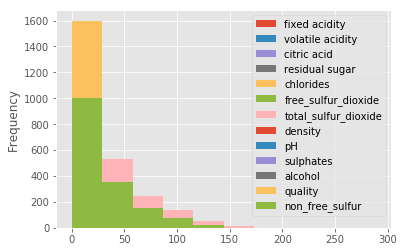

In [89]:
# Let's try a histogram first. 
df.plot(kind='hist') 

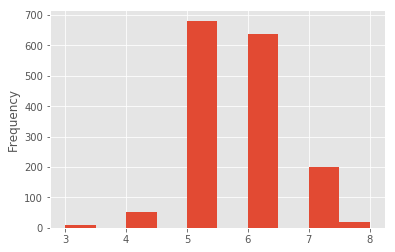

In [90]:
# That looked pretty bad. Since we didn't specify a column name to plot, Pandas just plotted
# all of them on top of one another. That's not what we want! Let's try selecting a column and doing that again. 
df['quality'].plot(kind='hist')

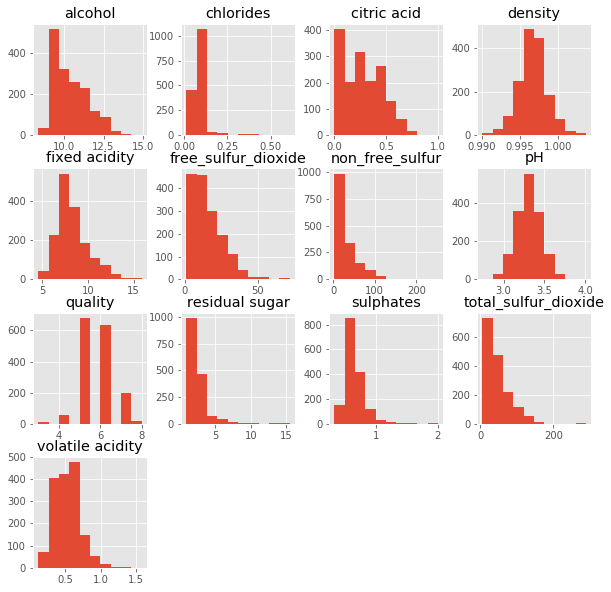

In [91]:
# We can also use .hist() to make a grid of histograms, one for each column.
# The figsize parameter is used for controlling the size of the figure on the screen
df.hist(figsize=(10,10));

In [92]:
# This next command will not work. Any guesses why?
df.plot(kind='scatter')

ValueError: scatter requires and x and y column

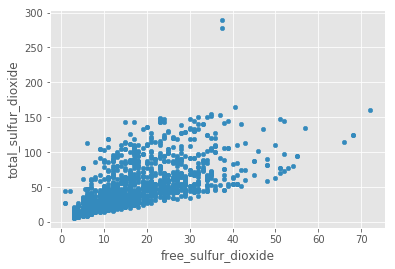

In [93]:
# As you might guess from the error, we have to specify X and Y columns for Pandas to plot. 
df.plot(kind='scatter', x='free_sulfur_dioxide', y='total_sulfur_dioxide')

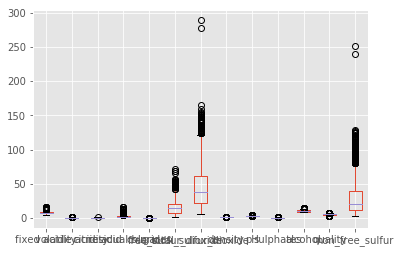

In [94]:
df.plot(kind='box')

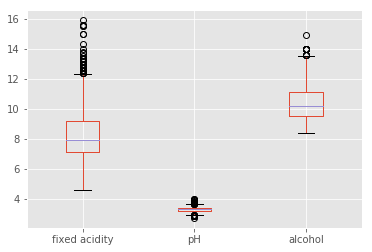

In [95]:
# We don't need to specify a column necessarily, but because of the different scales this 
# doesn't look too great. Let's specify three columns and see how that looks...
df[['fixed acidity', 'pH', 'alcohol']].plot(kind='box')

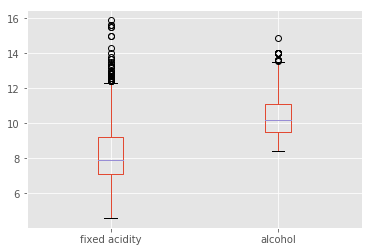

In [96]:
# This still doesn't look great - it's hard to really examine these three columns since pH is 
# so different from the other two. Let's drop pH and try one more time...
df[['fixed acidity', 'alcohol']].plot(kind='box')

In [138]:
class Cowboy:
    number_of_cowboys=0
    
    def __init__(self,name):
        self.name=name
        self.hat=True
        Cowboy.number_of_cowboys+=1
        
    def say_hi(self):
        print("Howdy, I'm {}".format(self.name))


In [139]:
c = Cowboy("Gus")
c2 = Cowboy("Henry")

In [140]:
type(c)

__main__.Cowboy

In [141]:
vars(c)

{'hat': True, 'name': 'Gus'}

In [142]:

vars(c2)

{'hat': True, 'name': 'Henry'}

In [143]:
c2.say_hi()

Howdy, I'm Henry


In [144]:
c.say_hi()

Howdy, I'm Gus


In [145]:
Cowboy.number_of_cowboys

2

In [178]:
c.number_of_cowboys

33

In [177]:
Cowboy("sdf")